<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/Reddit_NLP_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 13 documents
{"\ufeff'we": 1693, "'ve": 45, 'muzzl': 1053, 'cdc': 407, 'sourc': 1424, 'white': 1642, 'hous': 821, 'put': 1236, 'polit': 1186, 'ahead': 233, 'scienc': 1347, 'nearli': 1066, 'half': 780, 'twitter': 1566, 'account': 212, 'reopen': 1285, 'america': 249, 'bot': 363, 'social': 1422, 'distanc': 570, 'one': 1110, 'week': 1633, 'earlier': 596, 'could': 486, 'save': 1340, '36,000': 145, 'live': 949, 'studi': 1465, 'sick': 1399, 'woman': 1659, 'took': 1532, 'hydroxychloroquin': 827, 'year': 1677, 'treat': 1547, 'lupu': 963, 'still': 1449, 'got': 754, 'daili': 511, '20': 111, 'unconfirm': 1577, 'theori': 1514, '21': 118, 'sweden': 1486, 'becom': 326, 'countri': 489, 'highest': 801, 'death': 524, 'rate': 1248, 'per': 1162, 'capita': 391, 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


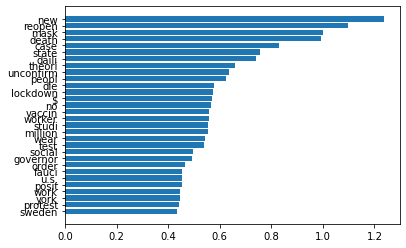

In [23]:
#stemming 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
#'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 
#'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
#'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
# 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
# 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
#'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
#'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 
#'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
# 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 13 documents
{"\ufeff'we 've": 3902, "'ve muzzl": 66, 'muzzl cdc': 2256, 'cdc sourc': 753, 'sourc white': 3155, 'white hous': 3759, 'hous put': 1722, 'put polit': 2741, 'polit ahead': 2611, 'ahead scienc': 383, 'scienc nearli': 3006, 'nearli half': 2278, 'half twitter': 1612, 'twitter account': 3555, 'account reopen': 343, 'reopen america': 2842, 'america bot': 415, 'bot social': 637, 'social distanc': 3148, 'distanc one': 1143, 'one week': 2412, 'week earlier': 3744, 'earlier could': 1210, 'could save': 910, 'save 36,000': 2991, '36,000 live': 240, 'live studi': 1973, 'studi sick': 3289, 'sick woman': 3107, 'woman took': 3788, 'took hydroxychloroquin': 3484, 'hydroxychloroquin year': 1745, 'year treat': 3860, 'treat lupu': 3513, 'lupu still

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


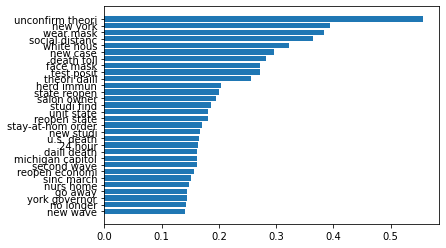

In [24]:
#stemming 2-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 13 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{"\ufeff'we 've muzzl": 4202, "'ve muzzl cdc": 67, 'muzzl cdc sourc': 2361, 'cdc sourc white': 773, 'sourc white hous': 3351, 'white hous put': 4045, 'hous put polit': 1811, 'put polit ahead': 2900, 'polit ahead scienc': 2768, 'ahead scienc nearli': 394, 'scienc nearli half': 3180, 'nearli half twitter': 2386, 'half twitter account': 1693, 'twitter account reopen': 3790, 'account reopen america': 353, 'reopen america bot': 3000, 'america bot social': 426, 'bot social distanc': 655, 'social distanc one': 3338, 'distanc one week': 1192, 'one week earlier': 2562, 'week earlier could': 4023, 'earlier could save': 1262, 'could save 36,000': 935, 'save 36,000 live': 3166, '36,000 live studi': 247, 'live studi sick': 2067, 'studi sick woman': 3500, 'sick woman took': 3285, 'woman took hydroxychloroquin': 4077, 'took hydroxychloroquin year': 3717, 'hydroxychloroquin year treat': 1836, 'year treat lupu': 4156, 'treat lupu still': 3747, 'lupu still got': 2115, 'still got daili': 3446, 'got daili

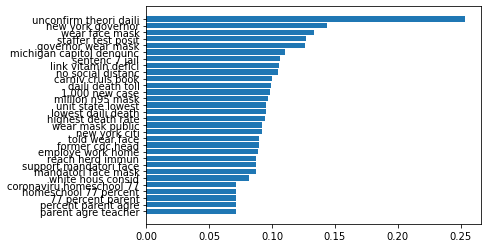

In [25]:
#stemming 3-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))       


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]
print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents
{"\ufeff'we": 1747, "'ve": 46, 'muzzle': 1082, 'cdc': 412, 'source': 1473, 'white': 1697, 'house': 843, 'put': 1275, 'politics': 1220, 'ahead': 236, 'science': 1393, 'nearly': 1095, 'half': 797, 'twitter': 1620, 'account': 213, 'reopen': 1326, 'america': 253, 'bots': 369, 'social': 1470, 'distance': 584, 'one': 1141, 'week': 1689, 'earlier': 607, 'could': 496, 'save': 1386, '36,000': 146, 'live': 978, 'sick': 1447, 'woman': 1714, 'take': 1547, 'hydroxychloroquine': 850, 'years': 1730, 'treat': 1599, 'lupus': 992, 'still': 1500, 'get': 760, '20': 112, 'unconfirmed': 1631, 'theories': 1566, '21': 119, 'sweden': 1538, 

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


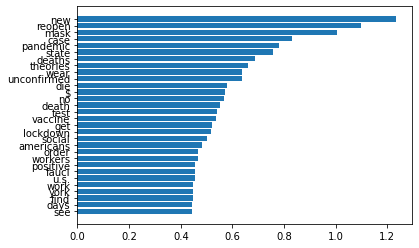

In [26]:
#lemmatization 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents
{"\ufeff'we 've": 3856, "'ve muzzle": 66, 'muzzle cdc': 2242, 'cdc source': 757, 'source white': 3137, 'white house': 3714, 'house put': 1706, 'put politics': 2725, 'politics ahead': 2598, 'ahead science': 383, 'science nearly': 2988, 'nearly half': 2264, 'half twitter': 1596, 'twitter account': 3526, 'account reopen': 343, 'reopen america': 2826, 'america bots': 415, 'bots social': 644, 'social distance': 3130, 'distance one': 1136, 'one week': 2400, 'week earlier': 3700, 'earlier could': 1185, 'could save': 918, 'save 36,000': 2974, '36,000 live': 240, 'live sick': 1958, 'sick woman': 3089, 'woman take': 3746, 'ta

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


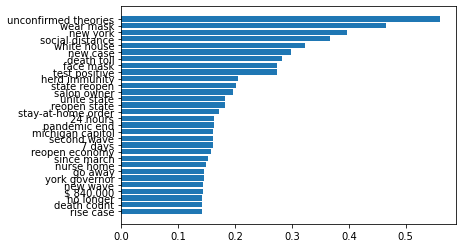

In [27]:
#lemmatization 2-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents
{"\ufeff'we 've muzzle": 4146, "'ve muzzle cdc": 67, 'muzzle cdc source': 2341, 'cdc source white': 777, 'source white house': 3325, 'white house put': 3993, 'house put politics': 1789, 'put politics ahead': 2877, 'politics ahead science': 2748, 'ahead science nearly': 393, 'science nearly half': 3154, 'nearly half twitter': 2366, 'half twitter account': 1670, 'twitter account reopen': 3744, 'account reopen america': 352, 'reopen america bots': 2977, 'america bots social': 425, 'bots social distance': 662, 'social distance one': 3312, 'distance one week': 1182, 'one week earlier': 2540, 'week earlier could': 3972, '

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


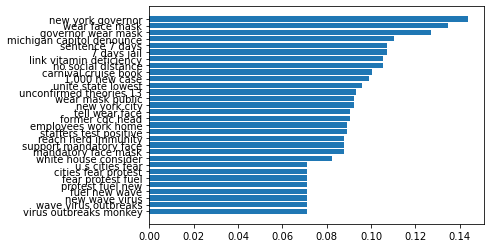

In [28]:
#lemmatization 3-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item, pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 13 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'ve", 'abov', 'ani', 'becaus', 'befor', 'daili', 'doe', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


{"\ufeff'we": 1670, "'ve": 45, 'muzzl': 1042, 'cdc': 404, 'sourc': 1408, 'white': 1622, 'hous': 815, 'put': 1224, 'polit': 1174, 'ahead': 233, 'scienc': 1334, 'nearli': 1055, 'half': 774, 'twitter': 1547, 'account': 212, 'reopen': 1273, 'america': 249, 'bot': 362, 'social': 1406, 'distanc': 568, 'one': 1099, 'week': 1614, 'earlier': 593, 'could': 484, 'save': 1327, '36,000': 145, 'live': 942, 'studi': 1449, 'sick': 1383, 'woman': 1639, 'take': 1478, 'hydroxychloroquin': 821, 'year': 1654, 'treat': 1528, 'lupu': 955, 'still': 1434, 'get': 739, 'daili': 509, '20': 111, 'unconfirm': 1558, 'theori': 1497, '21': 118, 'sweden': 1470, 'becom': 326, 'countri': 487, 'highest': 794, 'death': 522, 'rate': 1236, 'per': 1150, 'capita': 389, 'former': 707, 'employe': 608, 'serv': 1363, '11': 82, 'presid': 1192, 'die': 554, '91': 196, 'latest': 912, 'increas': 840, '106,000': 80, 'case': 398, 'worldwid': 1645, 'last': 910, 'globe': 743, 'experienc': 646, 'one-day': 1100, 'sinc': 1390, 'outbreak': 111

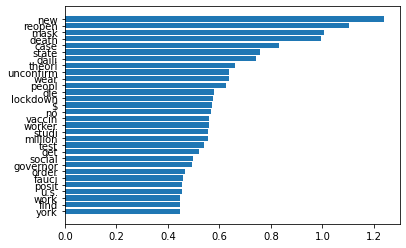

In [29]:
#stemming and lemmatization 1-gram
import collections
import nltk
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also","cove", "19", "covid",".",",","us","19.","?","thi", "hi","n't","'re", "covid-19",
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "coronaviru", "pandem","daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid"]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        lemma = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in stems]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()